In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch Gradients

## One Step

In [7]:
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [8]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
y

tensor(63., grad_fn=<AddBackward0>)

In [9]:
# Yukardaki ye denkleminin türevini aldı !!

y.backward()
print(x.grad)

tensor(93.)


# Multiple Steps

In [10]:
x = torch.tensor([[1.,2.,3.], [3.,2.,1.]], requires_grad = True)
x

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [11]:
# y = 3x+2

y = 3*x+2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [12]:
# z = 2y^2

z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [13]:
# Burda böyle diyemezsin çıktının sonuçu tek değere sahip olmalı !!!!

# z.backward()

out = z.mean()

print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [14]:
# Bu işlem hepsi için bir kere çalışmalı unutma !! Birdaha çalıştırırsan hata alırsın !!!

# z = 2(3x+2)^2 --- > Türev(Derivative) -- > 12(3x+2)
# dz/dx --> 12(3x+2) İlk x değerlerini bu değere yerleştireceğiz !!!

# Sonra çıkan değerleri 1/6 ile böleceğiz
# o = 1/6 (Toplam İşaret) "i=1 ile 6 arası (çünkü 2x3 matrix)"  Zi 

out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


# Linear Regression With PyTorch

In [15]:
X = torch.linspace(1,50,50).reshape(-1,1)
X.shape , X.dtype

(torch.Size([50, 1]), torch.float32)

In [16]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype = torch.float)
e.sum(), e.shape, e.dtype

(tensor(0.), torch.Size([50, 1]), torch.float32)

In [18]:
# y = 2X+1+e

y = 2*X + 1 + e
y.shape, y.dtype

(torch.Size([50, 1]), torch.float32)

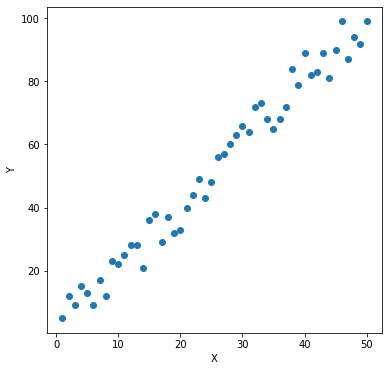

In [21]:
plt.figure(figsize = (6,6))
plt.scatter(X.numpy(), y.numpy())
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

In [23]:
torch.manual_seed(59)

model = nn.Linear(in_features = 2, out_features = 3)
print(model.weight)
print()
print(model.bias)

Parameter containing:
tensor([[ 0.0749,  0.6815],
        [-0.1204, -0.4529],
        [ 0.6085,  0.2339]], requires_grad=True)

Parameter containing:
tensor([0.0625, 0.4963, 0.4736], requires_grad=True)


In [24]:
# Bu ağrılıklar rastagele atılmış değerler unutma !!!

torch.manual_seed(59)

model = nn.Linear(in_features = 1, out_features = 1)
print(model.weight)
print()
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)

Parameter containing:
tensor([0.9638], requires_grad=True)


In [25]:
class Model(nn.Module):

    def __init__(self, in_features , out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):

        y_pred = self.linear(x)
        return y_pred

In [26]:
torch.manual_seed(59)
model = Model(in_features = 1 , out_features = 1)
print(model)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [28]:
print("Weight : ", model.linear.weight.item())
print()
print("Bias : ", model.linear.bias.item())

Weight :  0.10597813129425049

Bias :  0.9637961387634277


In [29]:
for name, param in model.named_parameters():
    print(name , "\t", param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [30]:
# weight*x + bias

x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [31]:
x1 = np.array([X.min(), X.max()])
print(x1)

[ 1. 50.]


In [32]:
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
print(f"Initial Weight : {w1:.8f} , Initial Bias : {b1:.8f}")
print()

y1 = w1*x1 + b1
print(y1)

Initial Weight : 0.10597813 , Initial Bias : 0.96379614

[1.0697743 6.2627025]


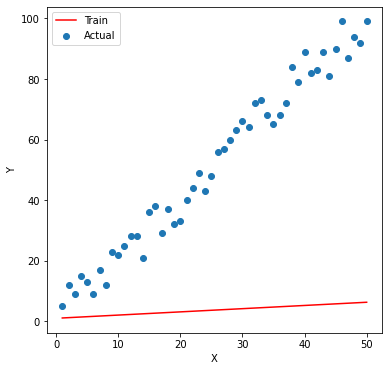

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(X.numpy(), y.numpy(), label = "Actual")
plt.plot(x1, y1, label = "Train",color = "red")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc = "best")
plt.show()

In [35]:
for i in model.parameters():
    print(i)
    print()

Parameter containing:
tensor([[0.1060]], requires_grad=True)

Parameter containing:
tensor([0.9638], requires_grad=True)



In [36]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [37]:
epochs = 50
losses = []

for i in range(epochs):

    i+=1
    y_pred = model.forward(X)

    loss = criterion(y_pred, y)
    losses.append(loss)

    print(f"Epoch : {i:2}, Loss : {loss.item():10.4f}, Weight : {model.linear.weight.item():10.4f}, Bias : {model.linear.bias.item():.4f}")

    # Gradients accumulate with every backprop. To prevent compounding we need to resert the stored gradient for each new epoch.
    optimizer.zero_grad()

    # Now we can backprop 
    loss.backward()

    # Finally, we can update the hyperparameters of our model
    optimizer.step()

Epoch :  1, Loss :  3057.2168, Weight :     0.1060, Bias : 0.9638
Epoch :  2, Loss :  1588.5306, Weight :     3.3349, Bias : 1.0605
Epoch :  3, Loss :   830.2999, Weight :     1.0148, Bias : 0.9923
Epoch :  4, Loss :   438.8522, Weight :     2.6818, Bias : 1.0425
Epoch :  5, Loss :   236.7614, Weight :     1.4840, Bias : 1.0077
Epoch :  6, Loss :   132.4291, Weight :     2.3446, Bias : 1.0340
Epoch :  7, Loss :    78.5657, Weight :     1.7262, Bias : 1.0163
Epoch :  8, Loss :    50.7578, Weight :     2.1705, Bias : 1.0303
Epoch :  9, Loss :    36.4012, Weight :     1.8512, Bias : 1.0215
Epoch : 10, Loss :    28.9892, Weight :     2.0806, Bias : 1.0290
Epoch : 11, Loss :    25.1624, Weight :     1.9158, Bias : 1.0249
Epoch : 12, Loss :    23.1865, Weight :     2.0342, Bias : 1.0291
Epoch : 13, Loss :    22.1661, Weight :     1.9491, Bias : 1.0273
Epoch : 14, Loss :    21.6391, Weight :     2.0102, Bias : 1.0299
Epoch : 15, Loss :    21.3668, Weight :     1.9662, Bias : 1.0293
Epoch : 16

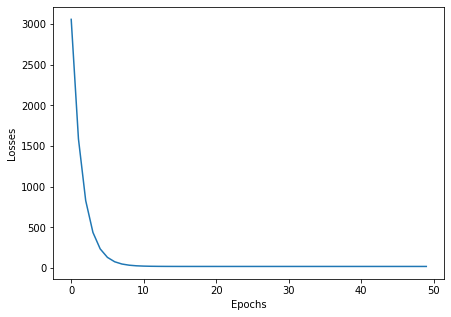

In [38]:
plt.figure(figsize = (7,5))
plt.plot(range(epochs), losses)
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.show()

In [40]:
for name, param in model.named_parameters():
    print(name, "\t", param.item())

linear.weight 	 1.9838191270828247
linear.bias 	 1.0557515621185303


In [41]:
x1 = np.array([X.min(), X.max()])

w1,b1 = model.linear.weight.item(),model.linear.bias.item()
print(f"Current Weight : {w1:4.2f}, Current Bias : {b1:.2f}")
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current Weight : 1.98, Current Bias : 1.06

[ 1. 50.]
[  3.0395708 100.246704 ]


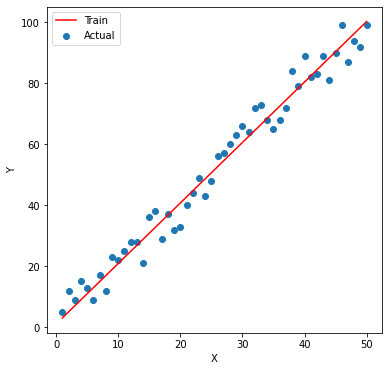

In [42]:
plt.figure(figsize = (6,6))
plt.scatter(X.numpy(), y.numpy(), label = "Actual")
plt.plot(x1, y1, label = "Train",color = "red") # plt.plot(X, X*w1 + b1) Farklı Şekli aynı mantık !!!
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc = "best")
plt.show()

# DataSets With PyTorch

In [43]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [44]:
path = "/content/drive/MyDrive/PyTorch/Data/iris.csv"
df = pd.read_csv(path)

print("Shape : ", df.shape)
print()
df.head()

Shape :  (150, 5)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [46]:
df["target"].unique()

array([0., 1., 2.])

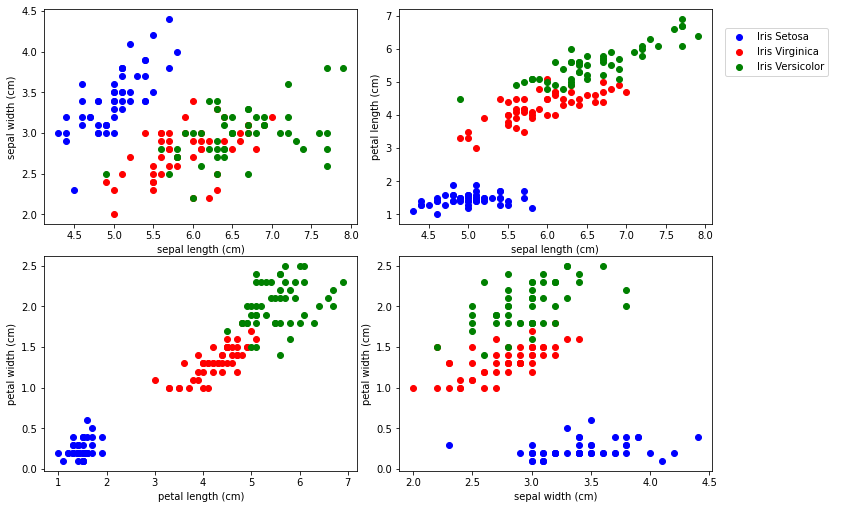

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7))
plt.tight_layout()

plots = [ (0,1), (0,2), (2,3), (1,3)]
colors = ["b","r","g"]
labels = ["Iris Setosa", "Iris Virginica", "Iris Versicolor"]

for i , ax in enumerate(axes.ravel()):

    for j in range(3):

        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]

        col = df[df["target"] == j]
        ax.scatter( col[x], col[y], color = colors[j])
        ax.set(xlabel = x, ylabel = y)

fig.legend(labels = labels , loc = 3, bbox_to_anchor = (1.0, 0.85))
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis = 1).values
y = df["target"].values

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120, 1]),
 torch.Size([30, 1]))

In [52]:
print(f"Training Size :", len(y_train))
print()
labels, counts = y_train.unique(return_counts = True)
print("Labels :", labels)
print("Counts :", counts )

Training Size : 120

Labels : tensor([0, 1, 2])
Counts : tensor([42, 42, 36])


# Using PyTorch's DataSet And DataLoader Classes

In [53]:
from torch.utils.data import TensorDataset, DataLoader

In [54]:
data = df.drop("target", axis = 1).values
labels = df["target"].values

iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels),)

In [55]:
len(iris), type(iris)

(150, torch.utils.data.dataset.TensorDataset)

In [56]:
#for i in iris:
#   print(i)

In [57]:
iris_loader = DataLoader(iris, batch_size = 60 , shuffle = True)

for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched[0].shape, sample_batched[1].shape, len(sample_batched))

0 torch.Size([60, 4]) torch.Size([60]) 2
1 torch.Size([60, 4]) torch.Size([60]) 2
2 torch.Size([30, 4]) torch.Size([30]) 2


In [58]:
#next(iter(iris_loader))

# Basics_PyTorch

In [59]:
import torch
import torch.nn 
import torch.nn.functional as F

In [60]:
class Model(nn.Module):

    def __init__(self,in_features , out_features):

        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):

        y_pred = self.linear(x)
        return y_pred

In [61]:
class Model(nn.Module):

    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)  # Input Layer
        self.fc2 = nn.Linear(h1, h2)           # Hidden Layer
        self.out = nn.Linear(h2, out_features) # Output Layer

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [62]:
torch.manual_seed(32)
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [65]:
for name,param in model.named_parameters():
    print(name, "\t", param)
    print()

fc1.weight 	 Parameter containing:
tensor([[ 0.3757, -0.2279, -0.0859,  0.2857],
        [-0.3870,  0.0793,  0.1481, -0.4771],
        [ 0.0874, -0.1746,  0.4485,  0.0219],
        [ 0.3782,  0.2254,  0.1929, -0.4741],
        [ 0.4319, -0.4087,  0.2177,  0.2271],
        [-0.0033,  0.4308, -0.1323, -0.2951],
        [ 0.1646, -0.1114, -0.4213, -0.3553],
        [-0.3191,  0.1440, -0.3496,  0.2280]], requires_grad=True)

fc1.bias 	 Parameter containing:
tensor([ 0.3867, -0.2029,  0.2828,  0.0105,  0.3187, -0.0630, -0.3122,  0.3781],
       requires_grad=True)

fc2.weight 	 Parameter containing:
tensor([[-0.2174,  0.0821,  0.2015, -0.2559, -0.3214,  0.1976, -0.3494, -0.2639],
        [ 0.1533, -0.1185,  0.2496, -0.0764,  0.0569, -0.1953,  0.0699, -0.3265],
        [-0.2689, -0.2716,  0.0416, -0.0628,  0.3519,  0.0132,  0.3048, -0.2101],
        [ 0.0877, -0.0607,  0.3204,  0.1180,  0.0254, -0.2260, -0.3002, -0.1128],
        [ 0.1822, -0.1912, -0.1485, -0.3094,  0.3335,  0.3195, -0.2034

In [73]:
path = "/content/drive/MyDrive/PyTorch/Data/iris.csv"
df = pd.read_csv(path)

X = df.drop("target", axis = 1).values
y = df["target"].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [74]:
from torch.utils.data import TensorDataset, DataLoader

trainloader = DataLoader(X_train, batch_size = 60, shuffle = True)
testloader = DataLoader(X_test, batch_size = 60 , shuffle = False)

In [75]:
torch.manual_seed(4)
model = Model()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [76]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 10 == 1:
        print(f"Epoch : {i:2}, Loss : {loss:.3f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch :  1, Loss : 1.096
Epoch : 11, Loss : 0.982
Epoch : 21, Loss : 0.791
Epoch : 31, Loss : 0.540
Epoch : 41, Loss : 0.357
Epoch : 51, Loss : 0.222
Epoch : 61, Loss : 0.129
Epoch : 71, Loss : 0.089
Epoch : 81, Loss : 0.072
Epoch : 91, Loss : 0.065


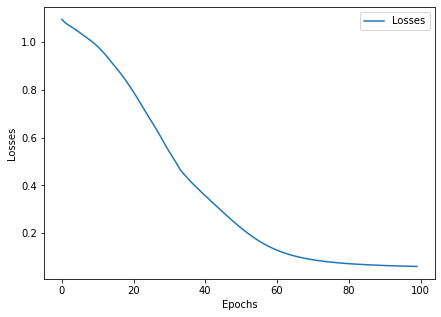

In [78]:
plt.figure(figsize = (7,5))
plt.plot( range(epochs),losses,label = "Losses")
plt.legend(loc = "best")
plt.xlabel("Epochs")
plt.ylabel("Losses");

In [79]:
len(X_train),len(losses)

(120, 100)

In [80]:
# Validate The Model

with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)

print(f"Loss : {loss:.4f}")

Loss : 0.0609


In [83]:
correct = 0

with torch.no_grad():

    for i ,data in enumerate(X_test):

        y_val = model.forward(data)

        print(f"{i+1:2}.) Val: {str(y_val):32}, Test : {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            correct+=1

print()
print(f"{correct} out of {len(y_test)} = {100*correct/len(y_test):2f}%correct")   

 1.) Val: tensor([ 3.9359, 11.8165,  6.0317]), Test : 1
 2.) Val: tensor([ 5.1327, 13.2105,  5.5340]), Test : 1
 3.) Val: tensor([15.8134,  9.9174,  0.0000]), Test : 0
 4.) Val: tensor([ 2.7494, 12.7806,  9.0326]), Test : 1
 5.) Val: tensor([ 0.0000, 12.4404, 15.7182]), Test : 2
 6.) Val: tensor([ 0.0000, 12.8935, 22.6560]), Test : 2
 7.) Val: tensor([16.2079, 10.2474,  0.0000]), Test : 0
 8.) Val: tensor([16.8392, 10.4608,  0.0000]), Test : 0
 9.) Val: tensor([ 0.0000, 12.9879, 15.3819]), Test : 2
10.) Val: tensor([ 0.0000, 13.5616, 18.9501]), Test : 2
11.) Val: tensor([ 0.0000, 13.4887, 20.2896]), Test : 2
12.) Val: tensor([15.0629,  9.3498,  0.0000]), Test : 0
13.) Val: tensor([ 0.0000, 12.8904, 19.1392]), Test : 2
14.) Val: tensor([ 2.4696, 12.4089,  9.0954]), Test : 1
15.) Val: tensor([ 0.0000, 13.3409, 15.8235]), Test : 2
16.) Val: tensor([ 4.8065, 12.7120,  5.5460]), Test : 1
17.) Val: tensor([ 0.4434, 12.2445, 12.2788]), Test : 2
18.) Val: tensor([17.1070, 10.6339,  0.0000]), T

In [89]:
torch.save(model.state_dict(), "IrisDataSetModel.pt")

new_model = Model()
new_model.load_state_dict(torch.load("IrisDataSetModel.pt"))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [90]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)

print(f"Loss : {loss:.5f}")

Loss : 0.06092


In [91]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

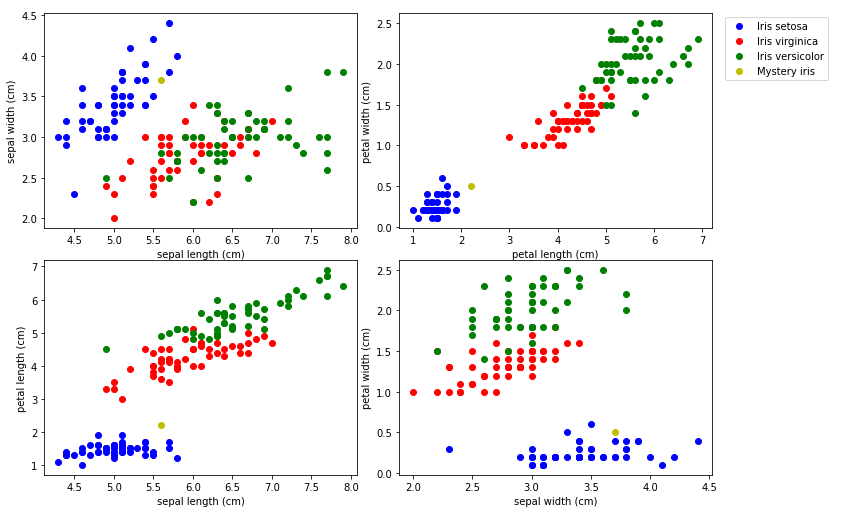

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.ravel()):
    for j in range(3):

        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [94]:
with torch.no_grad():

    print(new_model.forward(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([16.7028, 11.4300,  0.0000])

Iris setosa
